In [162]:
import random
import itertools
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np 
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

### Method 1

In [163]:
C = 0.25
n = 3

n_h = 3
n_d = 2
n_i = 3

α_h = [random.uniform(0, C / n) for _ in range(n_h)]
α_d = [random.uniform(0, C / n) for _ in range(n_d)]
α_i = [random.uniform(0, C / n) for _ in range(n_i)]

combinations = {}
for combination in list(itertools.product(*[
    range(0, n_asset) for n_asset in [n_h, n_d, n_i]
])):
    h, d, i = combination
    combinations[combination] = α_h[h] + α_d[d] + α_i[i]

In [164]:
pd.DataFrame.from_dict(combinations, orient='index').sort_values(0).tail(5)

,0
"(2, 1, 1)",0.113799
"(0, 0, 2)",0.119852
"(0, 1, 2)",0.120441
"(0, 0, 1)",0.120578
"(0, 1, 1)",0.121166


<AxesSubplot:>

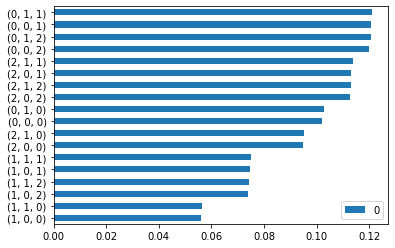

In [165]:
pd.DataFrame.from_dict(combinations, orient='index').sort_values(0).plot.barh()

Simulated data

In [166]:
data = []
idx = 0
for combination, p in combinations.items():
    clicks = (np.random.random(1000) <= p).astype('int')
    for click in clicks:
        data.append({
            'combination': combination,
            'click': click,
            'id': idx
        })
        idx += 1

<AxesSubplot:ylabel='combination'>

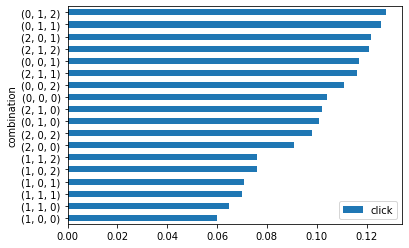

In [167]:
pd.DataFrame(data).groupby('combination')[['click']].mean().sort_values('click').plot.barh()

<AxesSubplot:xlabel='combination'>

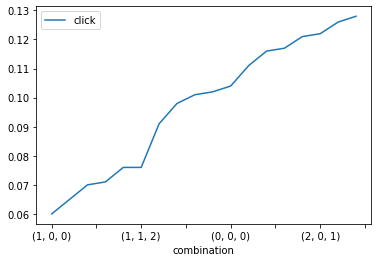

In [169]:
pd.DataFrame(data).groupby('combination')[['click']].mean().sort_values('click').plot()

In [168]:
dff = pd.DataFrame(data).groupby('combination').agg({
    'click': [list, 'mean']
})
dff.columns = ['sample', 'mean']
dff = dff.reset_index()
dff = dff.sort_values('mean')
# samples = pd.DataFrame(data).groupby('combination')['click'].apply(list).values

In [61]:
dff.head(5)

,combination,sample,mean
0,"(0, 0, 0)","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.044
6,"(1, 0, 0)","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.064
1,"(0, 0, 1)","[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",0.077
2,"(0, 0, 2)","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0.082
8,"(1, 0, 2)","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.085


Todo: fit \
$Y_i = \beta_0 + \beta_1 h_1 + ... + \theta_1 d_1 + ... + \xi_1 i_1 + ...$

### Method 2

In [156]:
α = 2
ℯ = 6
n = 3

n_h = 3
n_d = 2
n_i = 3

β = [random.uniform(-(ℯ / n), ℯ / n) for _ in range(n_h)]
θ = [random.uniform(-(ℯ / n), ℯ / n) for _ in range(n_d)]
ξ = [random.uniform(-(ℯ / n), ℯ / n) for _ in range(n_i)]

In [157]:
combinations = {}
for combination in list(itertools.product(*[
    range(0, n_asset) for n_asset in [n_h, n_d, n_i]
])):
    h, d, i = combination
    s = α + β[h] + θ[d] + ξ[i]
    combinations[combination] = 0.25 * (math.exp(s) / (1 + math.exp(s)))

<AxesSubplot:>

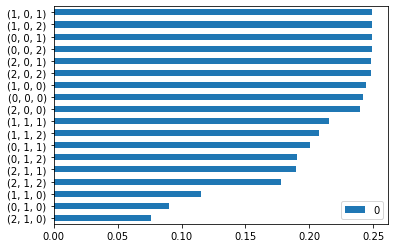

In [158]:
pd.DataFrame.from_dict(combinations, orient='index').sort_values(0).plot.barh()

In [159]:
data = []
idx = 0
for combination, p in combinations.items():
    clicks = (np.random.random(1000) <= p).astype('int')
    for click in clicks:
        data.append({
            'combination': combination,
            'click': click,
            'id': idx
        })
        idx += 1

<AxesSubplot:ylabel='combination'>

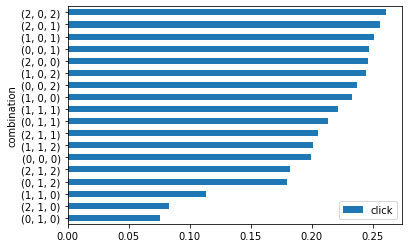

In [160]:
pd.DataFrame(data).groupby('combination')[['click']].mean().sort_values('click').plot.barh()

<AxesSubplot:xlabel='combination'>

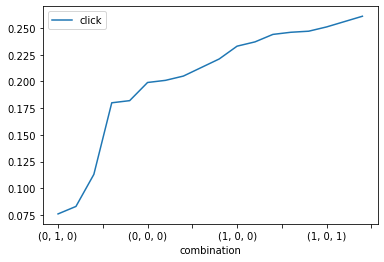

In [161]:
pd.DataFrame(data).groupby('combination')[['click']].mean().sort_values('click').plot()

### Method 3

So far we have taken the data simulation to be rather trivial, but this is probably not the case.

The problem is that we're ignoring the user's probability to click. 

The probability a user clicks on a website is not only dependent on the website, but also on the user's intent.

The web page just makes a user slight more / less likely to click.

In [210]:
users = []
for u in range(1000):
    p = random.random()
    if p < 0.1:
        users.append(random.uniform(0.7, 0.9))
    if p > 0.1:
        users.append(random.uniform(0.1, 0.15))

In [211]:
click = []
for p_user in users:
    p = random.random()
    if p < p_user:
        click.append(1)
    else:
        click.append(0)

In [212]:
np.mean(click)

0.201

We could have also sampled 1000 B(0.2) RVs, but this would not take into account users.

In [213]:
n = 3

n_h = 3
n_d = 2
n_i = 3

α_h = [random.uniform(-0.15 / n, 0.15 / n) for _ in range(n_h)]
α_d = [random.uniform(-0.15 / n, 0.15 / n) for _ in range(n_d)]
α_i = [random.uniform(-0.15 / n, 0.15 / n) for _ in range(n_i)]

combinations = {}
for combination in list(itertools.product(*[
    range(0, n_asset) for n_asset in [n_h, n_d, n_i]
])):
    h, d, i = combination
    combinations[combination] = α_h[h] + α_d[d] + α_i[i]

In [214]:
data = []
for u, p_user in enumerate(users):
    row = {}
    for c, f in combinations.items():
        row[c] = 1 if random.random() < (p_user + f) else 0
    data.append(row)

<AxesSubplot:>

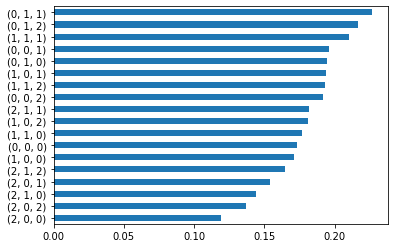

In [215]:
pd.DataFrame(data).mean().sort_values().plot.barh()